In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('data/IST_corrected_clean.csv',  index_col= [0])


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18792 entries, 0 to 19434
Columns: 114 entries, HOSPNUM to DEAD
dtypes: float64(16), int64(29), object(69)
memory usage: 16.5+ MB


In [106]:
# seting figuresize and lable size globally
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size']=14

sns.set_theme(palette = 'pastel', 
              font_scale=1.25)



In [107]:
age = df.AGE_bin.sort_values().unique().tolist()

In [6]:
age

['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99']

In [7]:
diagstr = df.DIAGSTR.unique().tolist()

In [8]:
stype = df.STYPE.unique().tolist()

In [153]:
rdisch14 = df.RDISCH14.unique().tolist()

In [175]:
occode = df.OCCODE.unique().tolist()

In [176]:
occode

['Dependent', 'Recovered', 'Not recovered', 'Dead']

In [109]:
diagstr

['Ischaemic stroke', 'Haemorrhagic stroke', 'Indeterminate stroke']

In [177]:

age_colors=['#c6dbef', '#9ecae1', '#6baed6', '#3182bd', '#08519c'] # blue-ish
COLOR_AGE = dict(zip(age, age_colors))
COLOR_SEX = {'F':'#a1dab4', 'M':'#2c7fb8'} #
COLOR_RATRIAL = {'Y':'#67a9cf', 'N':'#02818a'} 
diagstr_colors = ['#dd1c77', '#c994c7', '#e7e1ef']
COLOR_DIAGSTR = dict(zip(diagstr, diagstr_colors))
diagstr_colors = ['#e7e1ef', '#c994c7', '#dd1c77']
COLOR_RDISCH14 = dict(zip(rdisch14, diagstr_colors))
stype_colors = ['#f2f0f7', '#cbc9e2', '#9e9ac8', '#756bb1', '#54278f'] # violet-ish
COLOR_STYPE = dict(zip(stype, stype_colors))
occode_colors = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']
COLOR_OCCODE = dict(zip(occode, occode_colors))

In [11]:
#df.head()

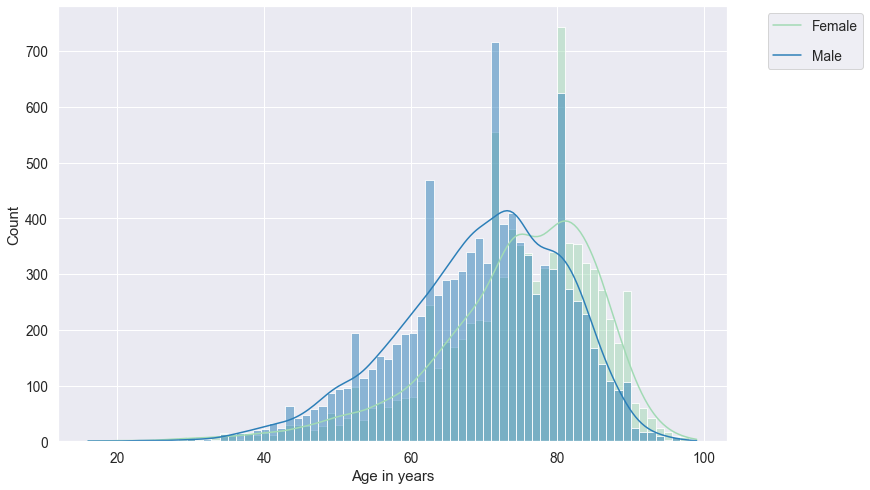

In [12]:
sns.histplot(x=df.AGE, kde=True, hue = df.SEX, palette = COLOR_SEX).set(xlabel='Age in years')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['Female', 'Male'], labelspacing=1.2)

#plt.savefig("images/age_count_sex.png", bbox_inches="tight")
plt.show()

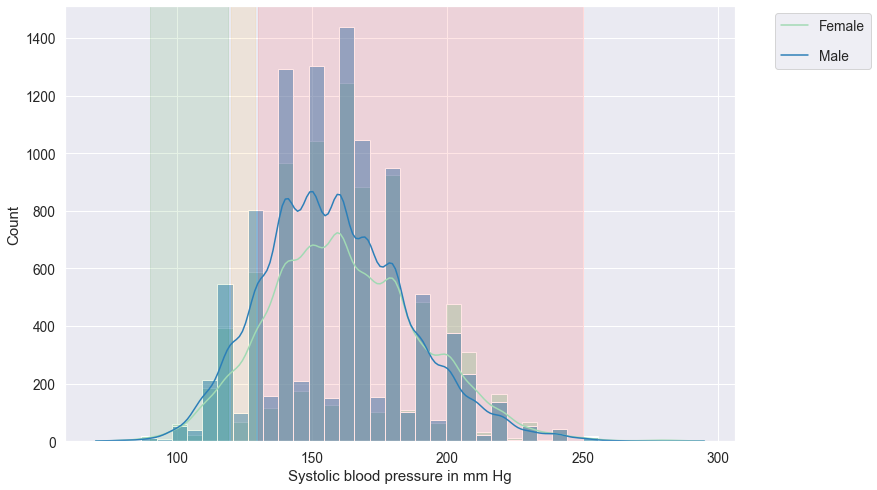

In [13]:
sns.histplot(x=df.RSBP, kde = True,  hue = df.SEX, bins = 40, palette = COLOR_SEX).set(xlabel='Systolic blood pressure in mm Hg')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['Female', 'Male'], labelspacing=1.2)

plt.axvspan(90, 119,alpha = 0.1, color = 'green')
plt.axvspan(120, 129,alpha = 0.1, color ='orange')
plt.axvspan(130, 250,alpha = 0.1, color ='red')

#plt.savefig("images/rsbp_count_sex.png", bbox_inches="tight")
plt.show()

# https://www.cdc.gov/bloodpressure/about.htm
# normal: less than 120 mm Hg
# at risk (pre hypertension): 120–129 mm Hg
# hypertension: 130 mm Hg or higher

<AxesSubplot:xlabel='RATRIAL', ylabel='count'>

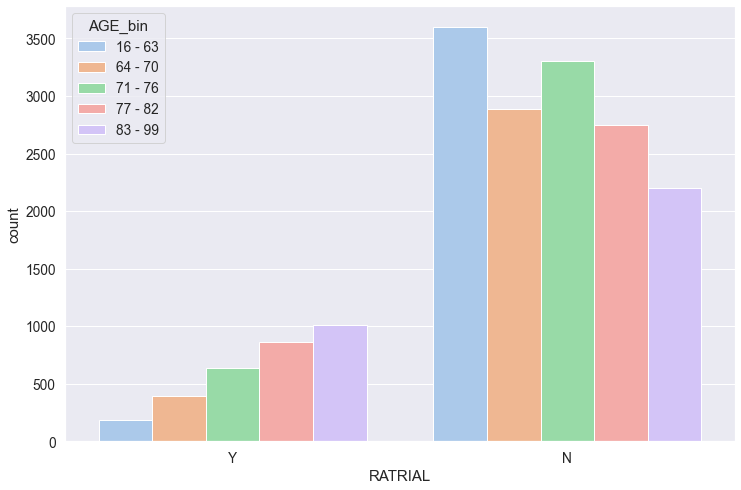

In [14]:
sns.countplot(x = df.RATRIAL, hue = df.AGE_bin.sort_values())

<AxesSubplot:xlabel='RATRIAL', ylabel='count'>

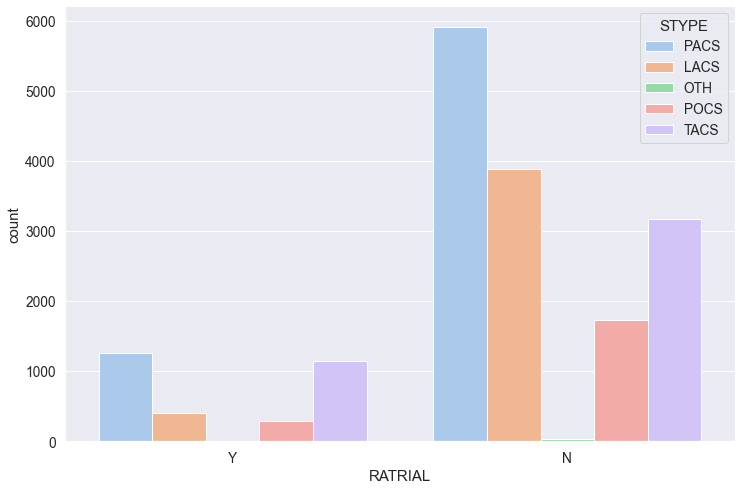

In [15]:
sns.countplot(x = df.RATRIAL, hue = df.STYPE)

<AxesSubplot:xlabel='RYEAR', ylabel='count'>

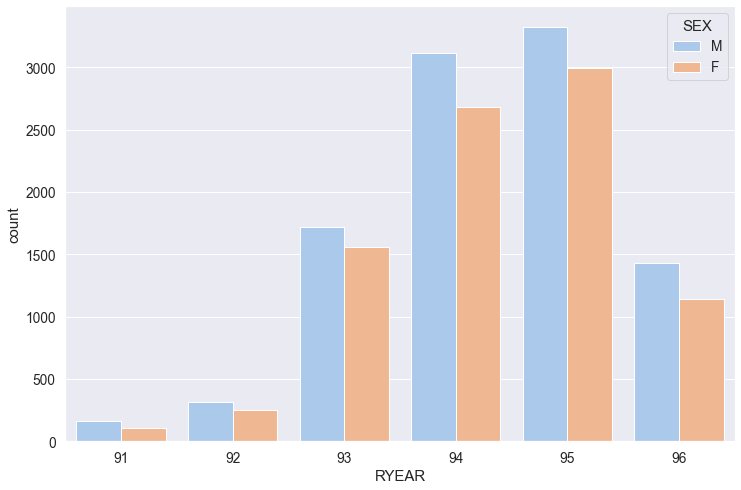

In [16]:
sns.countplot(x = df.RYEAR, hue = df.SEX)

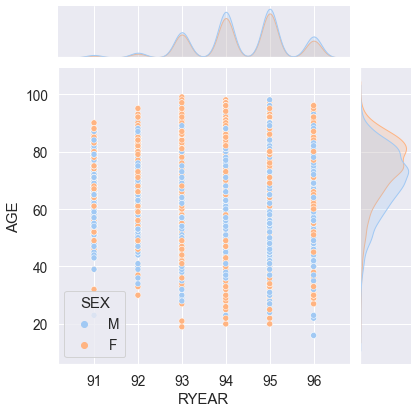

In [17]:
sns.jointplot(x = df.RYEAR, y = df.AGE, hue = df.SEX, kind = 'scatter')

In [18]:
df.groupby(['COUNTRY_ISO', 'SEX']).size().unstack(fill_value=0)

SEX             F     M
COUNTRY_ISO            
AR            204   302
AT            136    88
AU            234   345
BE            163   131
BR             32    43
CA             49    67
CH            759   811
CL             24    32
CZ            213   250
DK             12    21
ES            205   253
FI             33    52
FR              1     1
GB           2930  3127
GR             56    91
HK             51    57
HU             52    51
IE             26    31
IL             47    59
IN             62   140
IT           1476  1889
JP              4     4
LK              7    13
NL            329   365
NO            237   281
NZ            212   220
PL            364   378
PT            170   242
RO              8    10
SE            279   333
SG             59    77
SI             23    30
SK             40    43
TR            136   136
USA            69    57
ZA             27    33

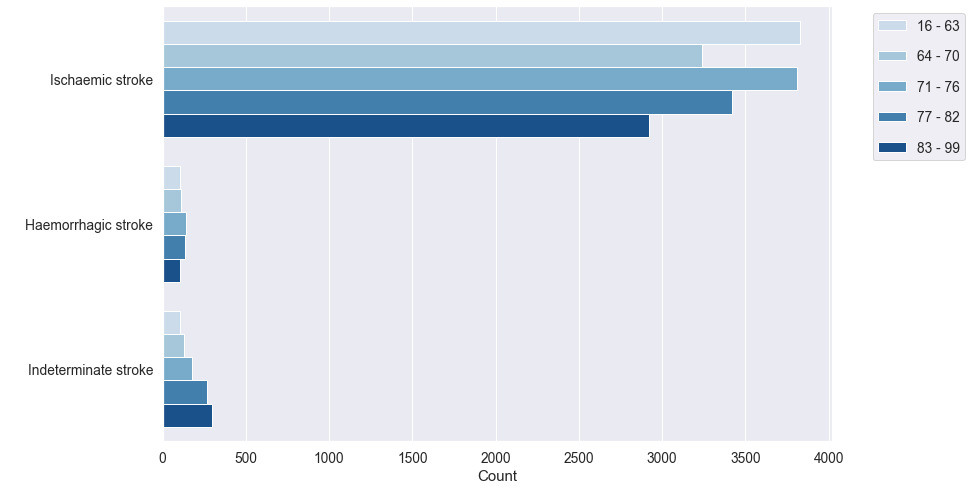

In [108]:
# combi of DDIAGISC, DDIAGHA, DDIAGUN, DNOSTRK
sns.countplot(y = df.DIAG, hue = df.AGE_bin.sort_values(), palette = COLOR_AGE).set(xlabel='Count', ylabel =' ')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

#plt.savefig("images/diag_count_age.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='DIAG'>

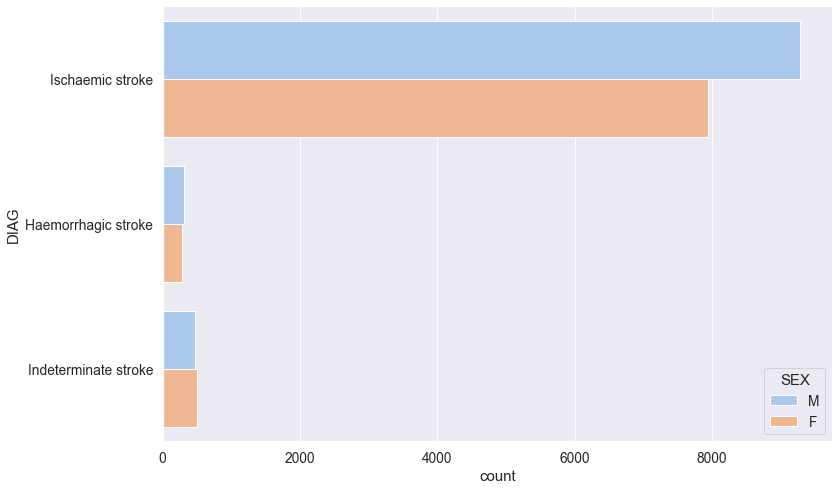

In [20]:
# combi of DDIAGISC, DDIAGHA, DDIAGUN, DNOSTRK
sns.countplot(y = df.DIAG, hue = df.SEX)

In [21]:
# Variable DIAGSTR (Unknown is dropped, so is "not a stroke")


<ipython-input-22-d275ec50c638>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


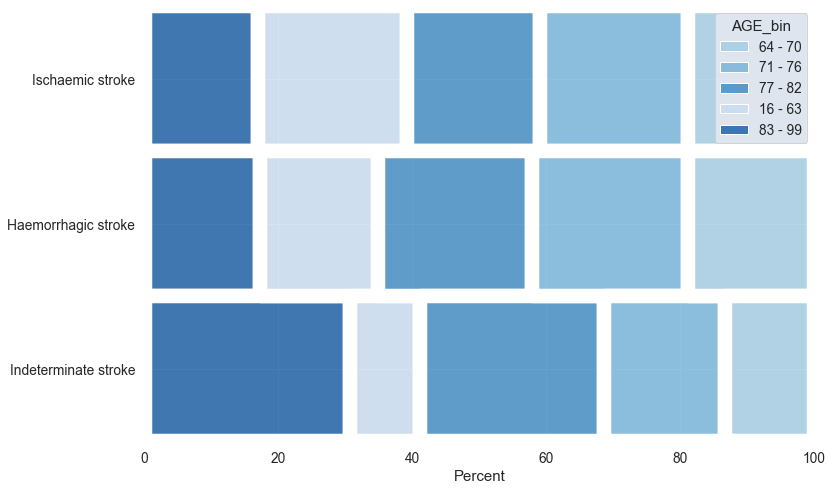

In [22]:
ax = sns.histplot(y = df.DIAGSTR,
                 hue= df.AGE_bin.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE,
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-113-a687d33a9953>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


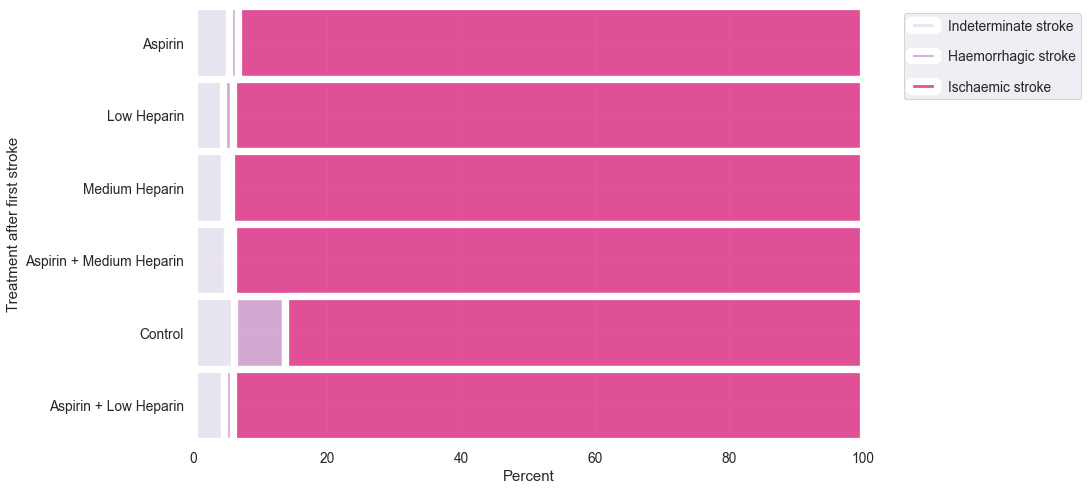

In [113]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.DIAGSTR,
                 stat = 'probability',
                 multiple="fill",
                 #order = ['Control', 'Aspirin', 'Low Heparin', 'Medium Heparin', 'Aspirin + Low Heparin', 'Aspirin + Medium Heparin']
                 palette = COLOR_DIAGSTR
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['Indeterminate stroke', 'Haemorrhagic stroke', 'Ischaemic stroke'], labelspacing=1.2)

#plt.savefig("images/treat_perc_diagstr.png", bbox_inches="tight")
plt.show()

<ipython-input-114-4c4866dff5a8>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


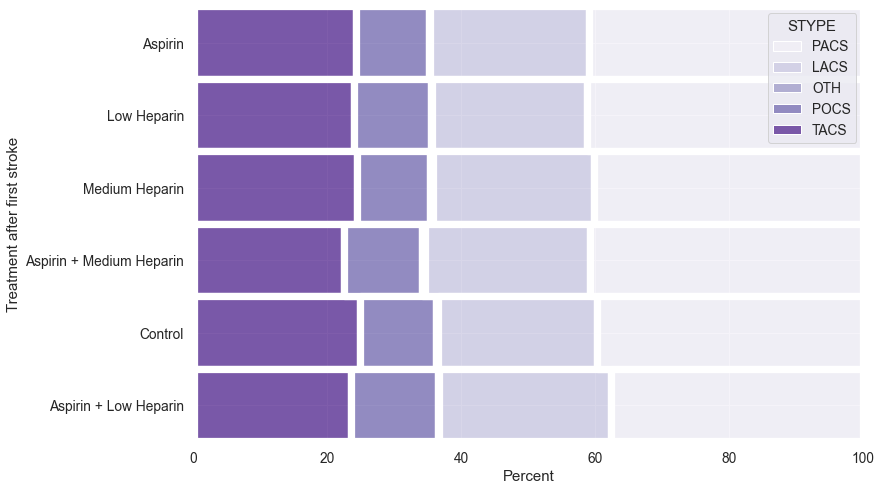

In [114]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 #order = ['Control', 'Aspirin', 'Low Heparin', 'Medium Heparin', 'Aspirin + Low Heparin', 'Aspirin + Medium Heparin']
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['Indeterminate stroke', 'Haemorrhagic stroke', 'Ischaemic stroke'], labelspacing=1.2)

#plt.savefig("images/treat_perc_diagstr.png", bbox_inches="tight")
plt.show()

In [24]:
df.DIAG.value_counts()

Ischaemic stroke        17224
Indeterminate stroke      973
Haemorrhagic stroke       595
Name: DIAG, dtype: int64

In [25]:
# Calculate percentage of patients for each kind of stroke

istr_count = df.DIAG.value_counts()[0] # total number of patients with an ischaemic stroke
ind_count = df.DIAG.value_counts()[1] # total number of patients with an indeterminate stroke
hstr_count = df.DIAG.value_counts()[2] # total number of patients with a haemorraghic stroke

print(round((istr_count/ (istr_count + ind_count + hstr_count) * 100),2)) # percentage of patients with an ischaemic stroke
print(round((ind_count/ (istr_count + ind_count + hstr_count) * 100),2)) # percentage of patients with an indeterminate stroke
print(round((hstr_count/ (istr_count + ind_count + hstr_count) * 100),2)) # percentage of patients with a haemorraghic stroke

91.66
5.18
3.17


In [26]:
group_str = df.groupby(by=['DIAGSTR', 'RDEF1'])
group_str['SEX'].value_counts()

DIAGSTR               RDEF1  SEX
Haemorrhagic stroke   C      M         5
                             F         4
                      N      M        70
                             F        59
                      Y      M       236
                             F       221
Indeterminate stroke  C      F        12
                             M         5
                      N      M       123
                             F       121
                      Y      F       371
                             M       341
Ischaemic stroke      C      M       114
                             F        96
                      N      M      2582
                             F      1888
                      Y      M      6587
                             F      5957
Name: SEX, dtype: int64

In [27]:
# Only keep patients with an ischaemic stroke => df['DDIAGISC'].eq('Y')
df = df[df['DDIAGISC'].eq('Y')]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17224 entries, 0 to 19434
Columns: 114 entries, HOSPNUM to DEAD
dtypes: float64(16), int64(29), object(69)
memory usage: 15.1+ MB


In [29]:
df.to_csv('data/IST_corrected_model.csv') 

In [30]:
df.AGE_bin.value_counts()

16 - 63    3830
71 - 76    3813
77 - 82    3420
64 - 70    3239
83 - 99    2922
Name: AGE_bin, dtype: int64

<ipython-input-31-48263f42bcfe>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


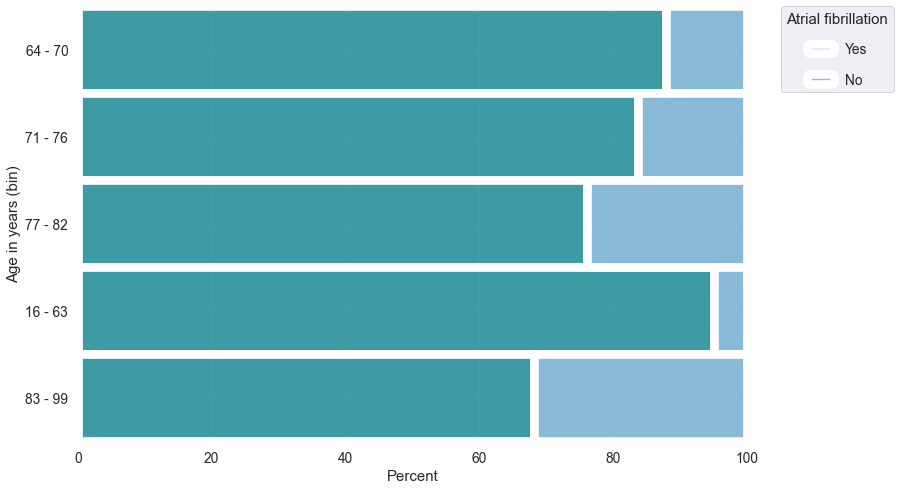

In [31]:
ax = sns.histplot(y = df.AGE_bin.sort_values(),
                 hue= df.RATRIAL,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_RATRIAL
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Age in years (bin)")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
           labels = ['Yes', 'No'], labelspacing=1.2, title = 'Atrial fibrillation')

#plt.savefig("images/age_perc_ratrial.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='RVISINF', ylabel='count'>

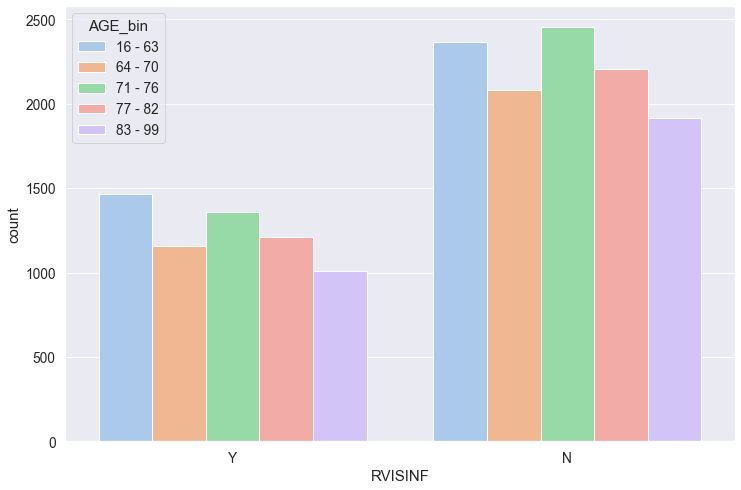

In [32]:
sns.countplot(x=df.RVISINF.sort_values(ascending=False), hue = df.AGE_bin.sort_values())

<AxesSubplot:xlabel='RHEP24', ylabel='count'>

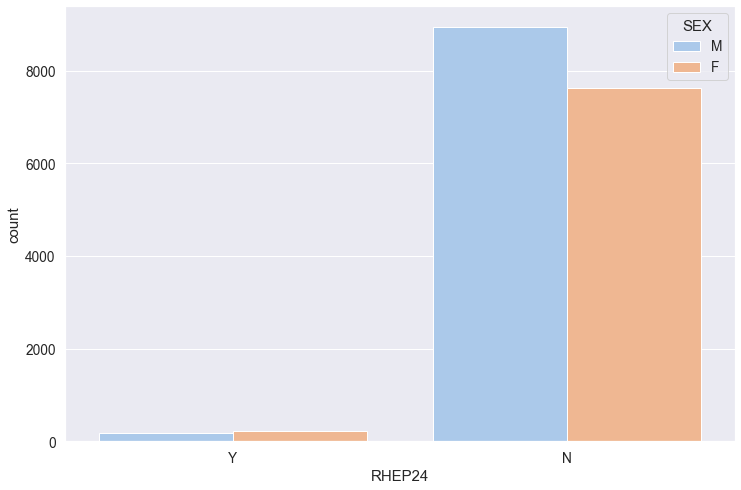

In [33]:
sns.countplot(x=df.RHEP24.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RASP3', ylabel='count'>

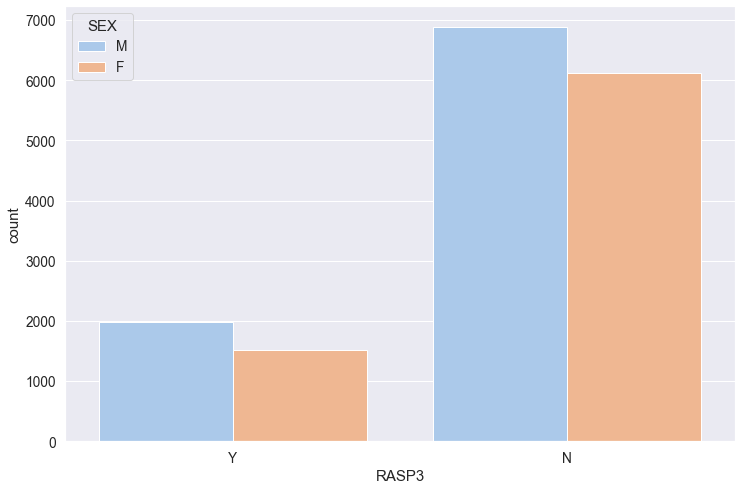

In [34]:
sns.countplot(x=df.RASP3.sort_values(ascending=False), hue = df.SEX)

In [35]:
# Types of strokes and its associated symptoms

In [36]:
group_str = df.groupby(by=['STYPE', 'RDEF1'])
group_str['SEX'].value_counts()

STYPE  RDEF1  SEX
LACS   C      M         6
              F         5
       N      M       639
              F       481
       Y      M      1750
              F      1296
OTH    N      M        27
              F        22
PACS   C      F        51
              M        50
       N      M      1136
              F       881
       Y      M      2512
              F      2277
POCS   C      M        18
              F        10
       N      M       632
              F       343
       Y      M       583
              F       402
TACS   C      M        40
              F        30
       N      F       161
              M       148
       Y      F      1982
              M      1742
Name: SEX, dtype: int64

In [37]:
# Kick out patients with STPYE == 'OTH' (only few patients with this diagnosis)
df = df[df['STYPE'] != 'OTH']

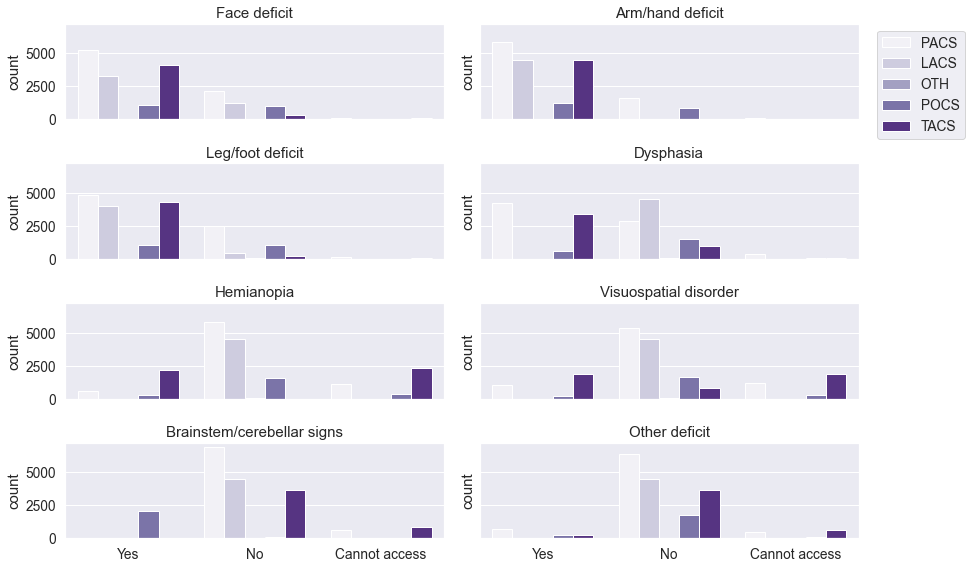

In [122]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.tight_layout(h_pad=2)

sns.countplot(x=df.RDEF1.sort_values(ascending=False), hue = df.STYPE, ax = ax1, palette = COLOR_STYPE).set_title('Face deficit')
ax1.get_legend().remove()
ax1.set(xlabel=None)
sns.countplot(x=df.RDEF2.sort_values(ascending=False), hue = df.STYPE, ax = ax2, palette = COLOR_STYPE).set_title('Arm/hand deficit')
ax2.legend(bbox_to_anchor= (1.03, 1))
ax2.set(xlabel=None)
sns.countplot(x=df.RDEF3.sort_values(ascending=False), hue = df.STYPE, ax = ax3, palette = COLOR_STYPE).set_title('Leg/foot deficit')
ax3.get_legend().remove()
ax3.set(xlabel=None)
sns.countplot(x=df.RDEF4.sort_values(ascending=False), hue = df.STYPE, ax = ax4, palette = COLOR_STYPE).set_title('Dysphasia')
ax4.get_legend().remove()
ax4.set(xlabel=None)
sns.countplot(x=df.RDEF5.sort_values(ascending=False), hue = df.STYPE, ax = ax5, palette = COLOR_STYPE).set_title('Hemianopia')
ax5.get_legend().remove()
ax5.set(xlabel=None)
sns.countplot(x=df.RDEF6.sort_values(ascending=False), hue = df.STYPE, ax = ax6, palette = COLOR_STYPE).set_title('Visuospatial disorder')
ax6.get_legend().remove()
ax6.set(xlabel=None)
sns.countplot(x=df.RDEF7.sort_values(ascending=False), hue = df.STYPE, ax = ax7, palette = COLOR_STYPE).set_title('Brainstem/cerebellar signs')
ax7.get_legend().remove()
ax7.set(xlabel=None)
ax7.set_xticklabels(['Yes', 'No', 'Cannot access'])
sns.countplot(x=df.RDEF8.sort_values(ascending=False), hue = df.STYPE, ax = ax8, palette = COLOR_STYPE).set_title('Other deficit')
ax8.get_legend().remove()
ax8.set(xlabel=None)
ax8.set_xticklabels(['Yes', 'No', 'Cannot access'])


#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')

#plt.savefig("images/rdef_count_stype.png", bbox_inches="tight")

plt.show()

<ipython-input-39-317601ac996d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-39-317601ac996d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


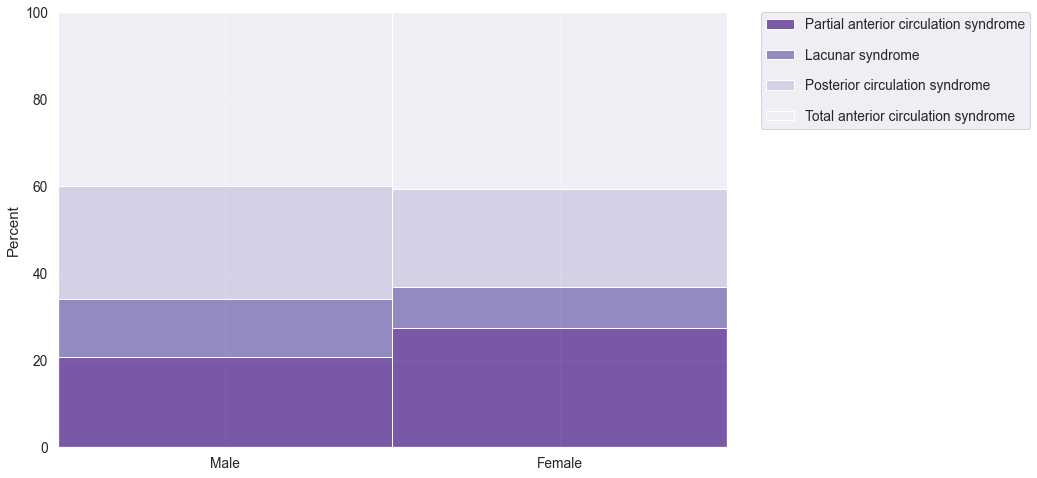

In [39]:
ax = sns.histplot(x = df.SEX.sort_values(),
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
          labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [40]:
group_f_ddead = df.query('SEX == "F"').groupby('DDEAD')
group_f_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     2923
       LACS     1736
       TACS     1717
       POCS      671
Y      TACS      456
       PACS      286
       POCS       84
       LACS       46
Name: STYPE, dtype: int64

In [41]:
group_m_ddead = df.query('SEX == "M"').groupby('DDEAD')
group_m_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     3428
       LACS     2344
       TACS     1546
       POCS     1126
Y      TACS      384
       PACS      270
       POCS      107
       LACS       51
Name: STYPE, dtype: int64

<AxesSubplot:xlabel='DASPLT', ylabel='count'>

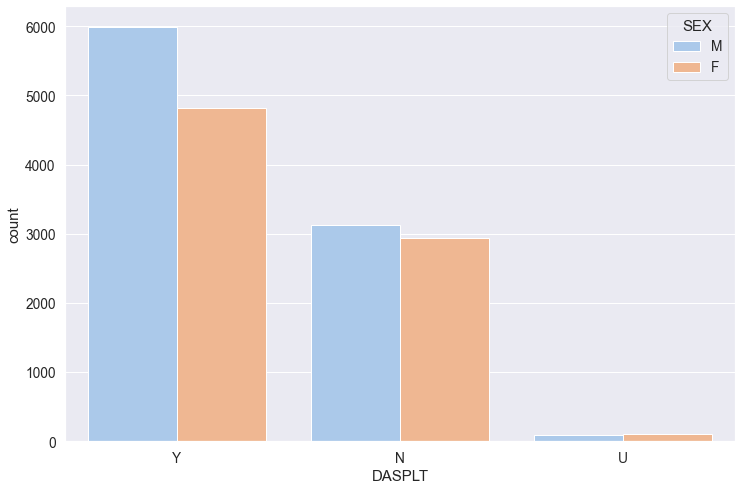

In [42]:
sns.countplot(x = df.DASPLT, hue = df.SEX)

<AxesSubplot:xlabel='ONDRUG', ylabel='AGE'>

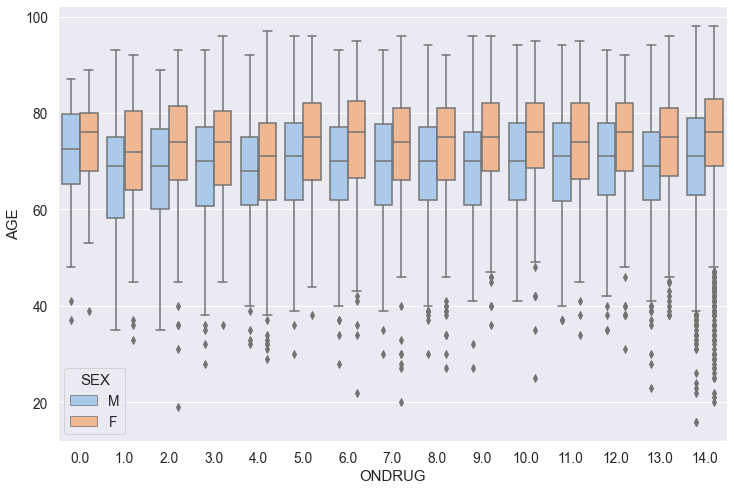

In [43]:
sns.boxplot(x = df.ONDRUG,y = df.AGE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DMEDS'>

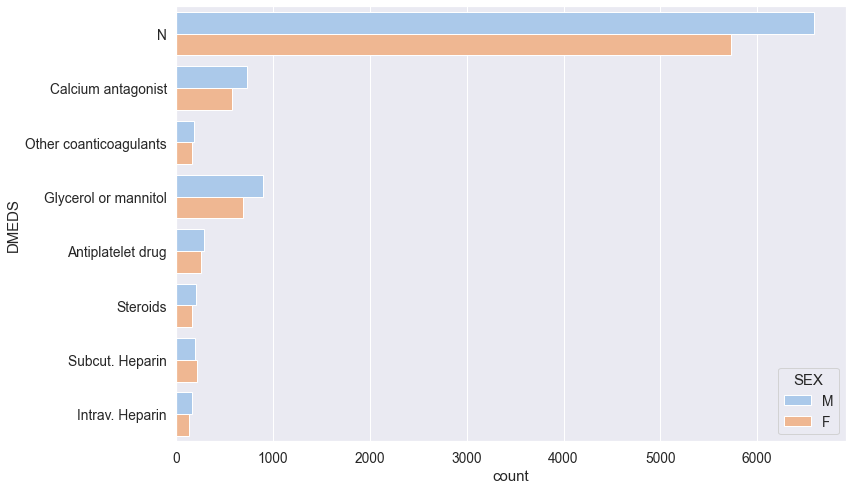

In [44]:
# combi of DSCH, DIVH, DAP, DOAC, DGORM, DSTER and DCAA
sns.countplot(y = df.DMEDS, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DMEDS'>

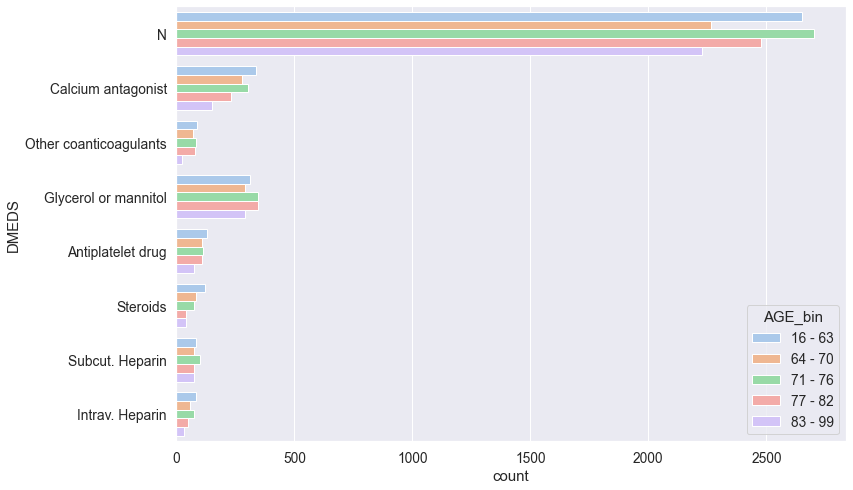

In [45]:
sns.countplot(y = df.DMEDS, hue = df.AGE_bin.sort_values())

In [46]:
#some kind of surgery?
group_sur = df.groupby(by=['DHAEMD', 'DCAREND', 'DTHROMB'])
group_sur['STYPE'].value_counts()

DHAEMD  DCAREND  DTHROMB  STYPE
N       N        N        PACS     6394
                          LACS     3858
                          TACS     3806
                          POCS     1816
                 U        LACS        1
                 Y        TACS        6
                          LACS        3
                          PACS        2
                          POCS        1
        U        N        PACS        3
        Y        N        PACS       15
                          LACS       14
                          POCS        5
                          TACS        4
U       N        N        PACS        1
        U        N        PACS        4
                          TACS        3
                          LACS        1
                 U        PACS        2
                          LACS        1
                          POCS        1
                          TACS        1
Y       N        N        PACS      213
                          LACS      129
        

<AxesSubplot:xlabel='count', ylabel='RDIAG14'>

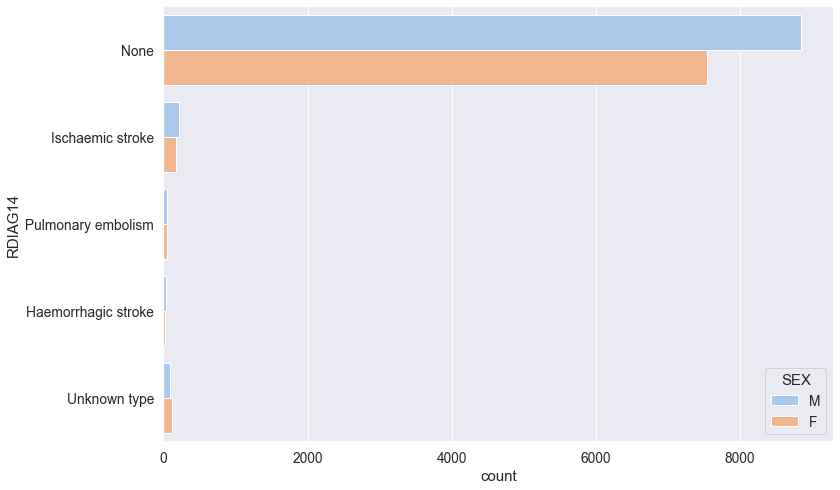

In [47]:
# Another occurrence of a stroke within 14 days of the first one?
# combined RSISC, DRSH, DRSUNK, DPE
sns.countplot(y = df.RDIAG14, hue = df.SEX)

In [48]:
#some kind of surgery?
group_sur = df.groupby(by=['RDIAG14','STYPE'])
group_sur['SEX'].value_counts()

RDIAG14              STYPE  SEX
Haemorrhagic stroke  LACS   M         4
                            F         2
                     PACS   M        17
                            F         9
                     POCS   F         6
                            M         1
                     TACS   M        19
                            F        11
Ischaemic stroke     LACS   M        49
                            F        34
                     PACS   M        91
                            F        68
                     POCS   M        32
                            F        28
                     TACS   F        49
                            M        45
None                 LACS   M      2322
                            F      1722
                     PACS   M      3537
                            F      3073
                     POCS   M      1184
                            F       708
                     TACS   F      2043
                            M      1809
Pulmonar

<AxesSubplot:xlabel='count', ylabel='RDIAG14'>

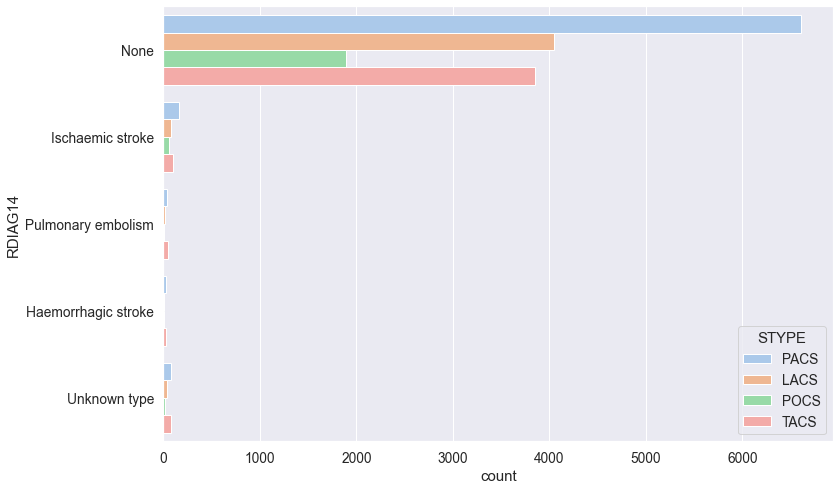

In [49]:
sns.countplot(y = df.RDIAG14, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

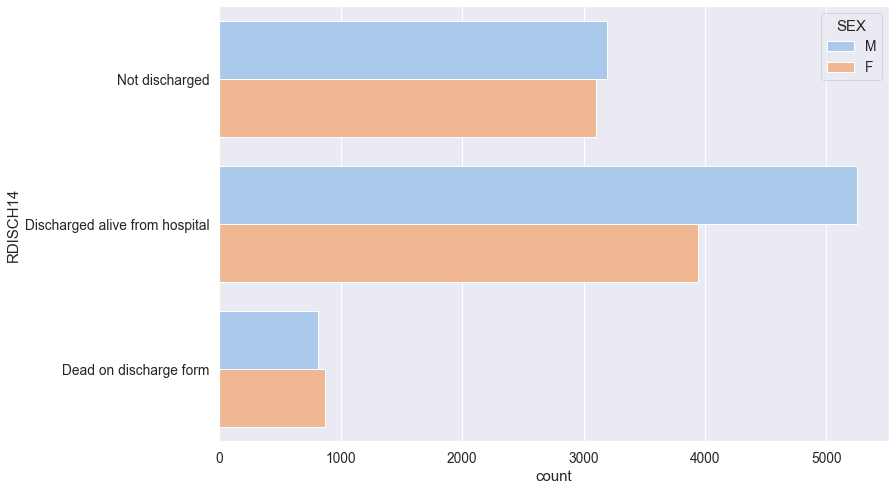

In [50]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

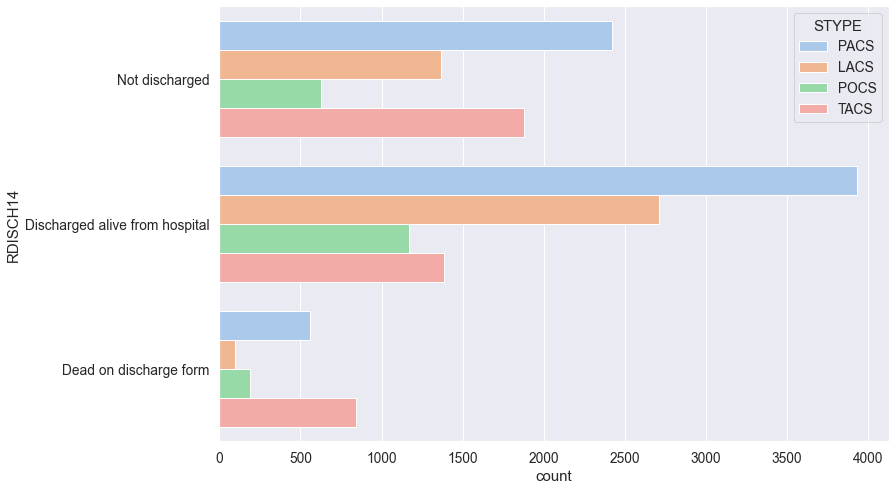

In [51]:
sns.countplot(y = df.RDISCH14, hue = df.STYPE)

<ipython-input-159-3242f58587e8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


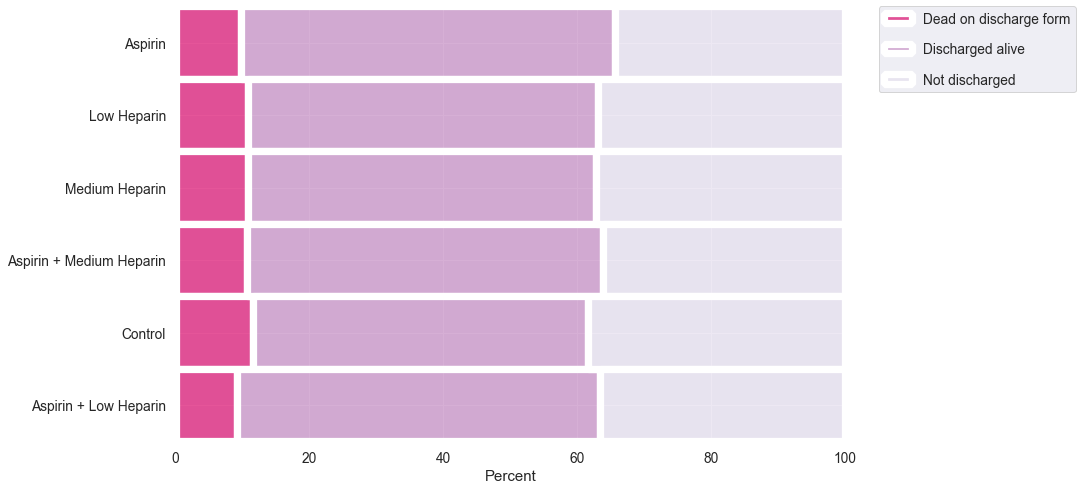

In [159]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.RDISCH14,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_RDISCH14
                 )
ax.set(ylabel="")
ax.set(xlabel="Percent")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
        labels = ['Dead on discharge form', 'Discharged alive', 'Not discharged'], labelspacing=1.2)

#plt.savefig("images/treat_perc_disch14.png", bbox_inches="tight")
plt.show()

<ipython-input-52-b45f08cf84af>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


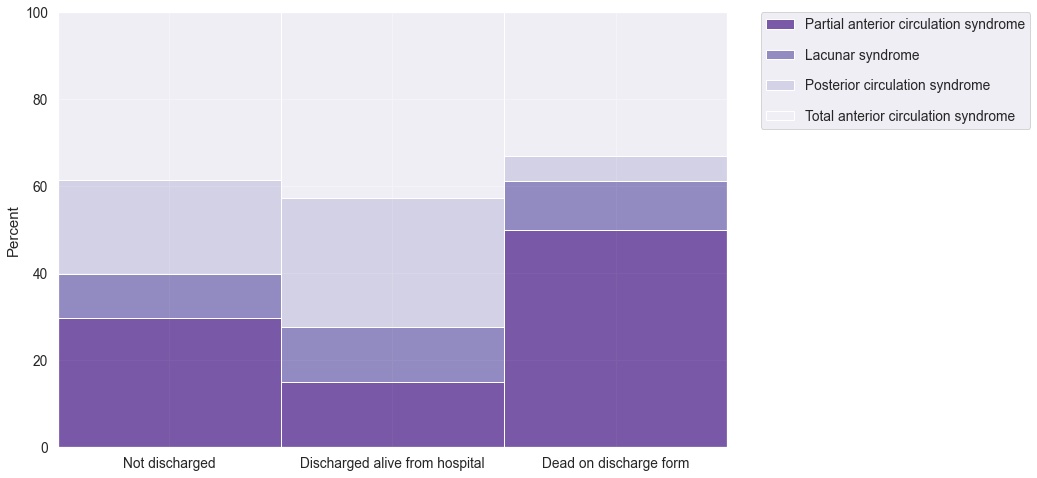

In [52]:
ax = sns.histplot(x = df.RDISCH14,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [132]:
df_male = df.loc[df['SEX'] == 'M']
df_female = df.loc[df['SEX'] == 'F']

<ipython-input-146-e0db7f4e7fb7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)


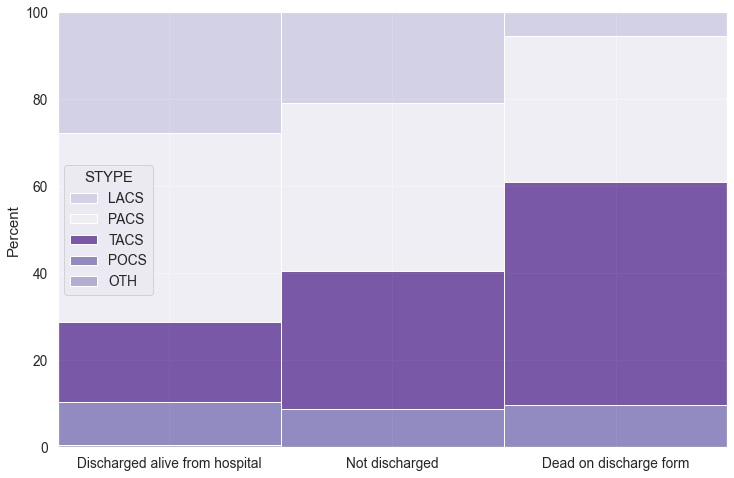

In [146]:
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1 = sns.histplot(x = df_female.RDISCH14.sort_values(),
                 hue= df_female.STYPE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                )
ax1.set(xlabel="")
ax1.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax1.get_yticks()*100]
ax1.set_yticklabels(ylabels)


#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

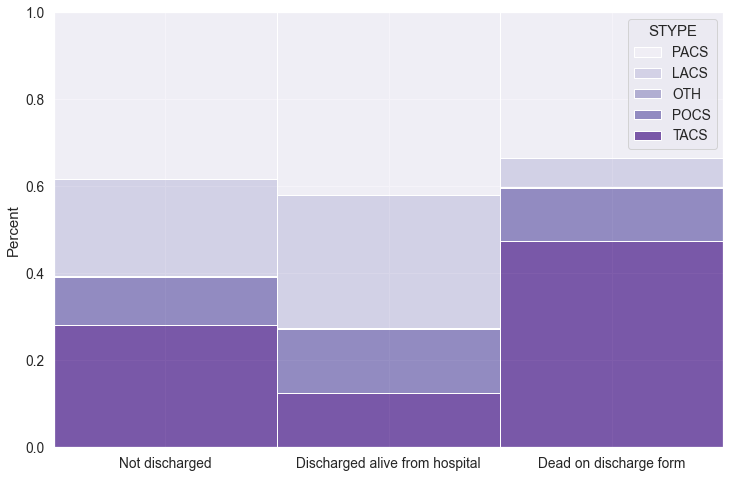

In [145]:

ax2 = sns.histplot(x = df_male.RDISCH14,
                 hue= df_male.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax2.set(xlabel="")
ax2.set(ylabel="Percent")

#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [128]:
print(df.RDISCH14.value_counts())
print(df.AGE_bin.value_counts())
df.SEX.value_counts()

Discharged alive from hospital    9906
Not discharged                    6896
Dead on discharge form            1990
Name: RDISCH14, dtype: int64
71 - 76    4128
16 - 63    4036
77 - 82    3825
64 - 70    3480
83 - 99    3323
Name: AGE_bin, dtype: int64


M    10063
F     8729
Name: SEX, dtype: int64

In [126]:
sns.catplot(x=df.RDISCH14, col=df.AGE_bin, hue=df.SEX, kind='count')

TypeError: 'NoneType' object is not subscriptable

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

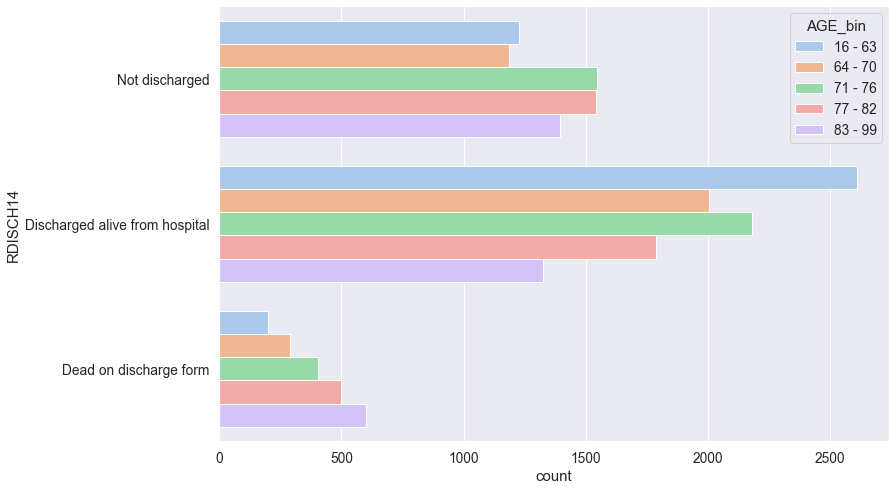

In [125]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.AGE_bin.sort_values())

<ipython-input-54-959d39dfbb8c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


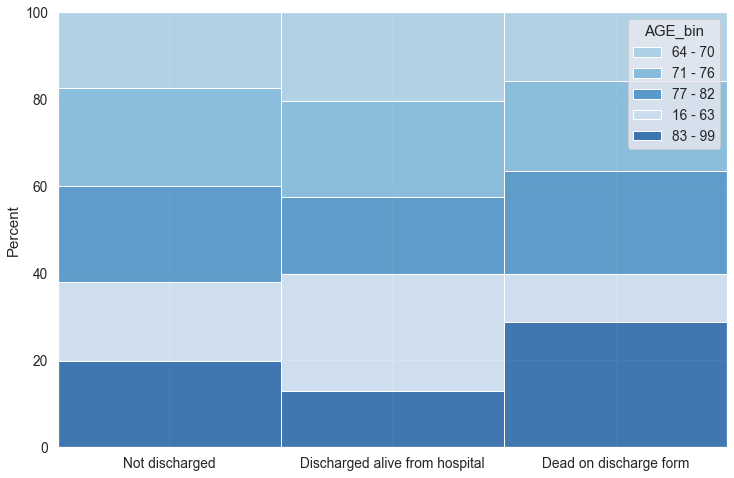

In [54]:
ax = sns.histplot(x = df.RDISCH14,
                 hue= df.AGE_bin.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
#           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [55]:
#df['DPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

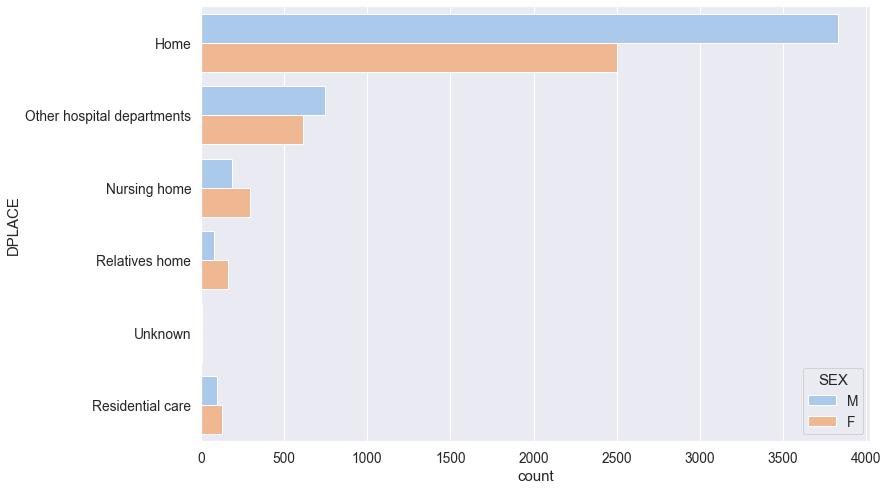

In [56]:
sns.countplot(y = df.DPLACE, hue = df.SEX)

In [57]:
ax = sns.histplot(x = df.DPLACE,
                 hue= df.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()


TypeError: unsupported operand type(s) for -: 'str' and 'float'

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

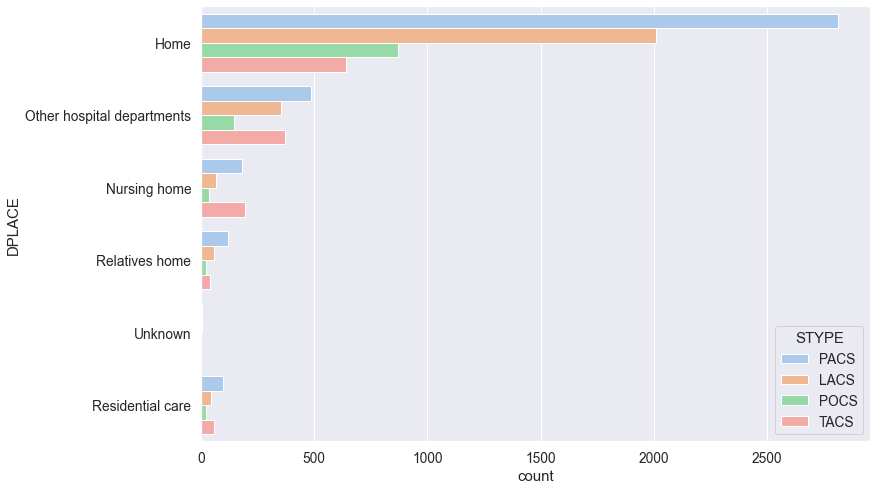

In [58]:
sns.countplot(y = df.DPLACE, hue = df.STYPE)

In [59]:
ax = sns.histplot(x = df.DPLACE,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

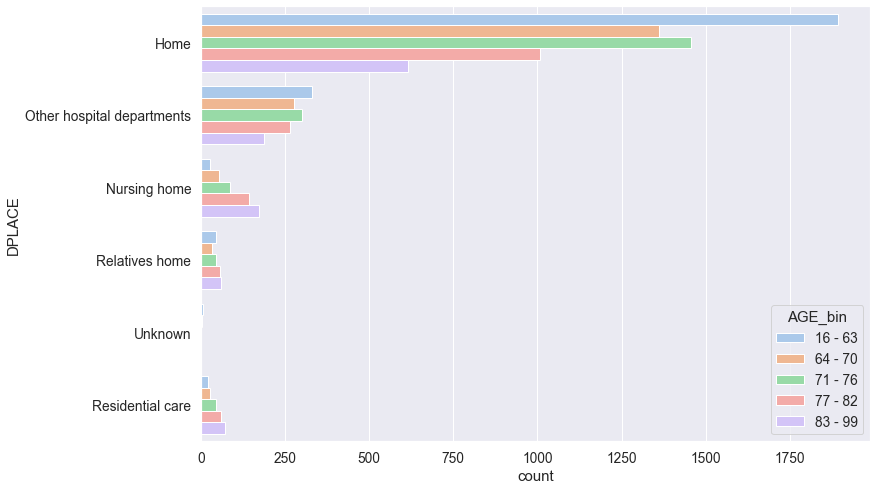

In [60]:
sns.countplot(y = df.DPLACE, hue = df.AGE_bin.sort_values())

In [61]:
ax = sns.histplot(x = df.DPLACE,
                 hue= df.AGE_bin,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [58]:
#df['DDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='FDEAD', ylabel='count'>

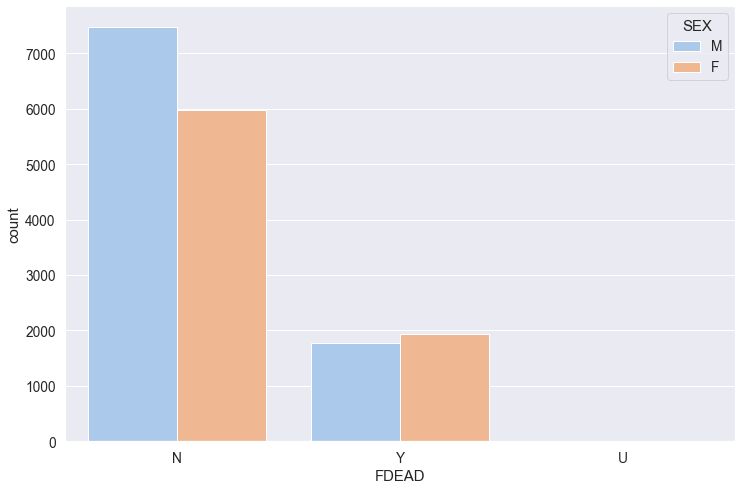

In [59]:
sns.countplot(x = df.FDEAD, hue = df.SEX)

<AxesSubplot:xlabel='FDEAD', ylabel='count'>

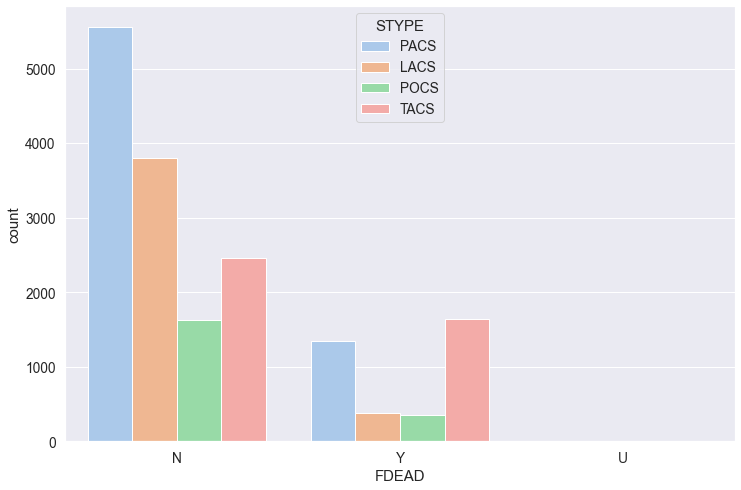

In [60]:
sns.countplot(x = df.FDEAD, hue = df.STYPE)

<ipython-input-174-023fa7af1183>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


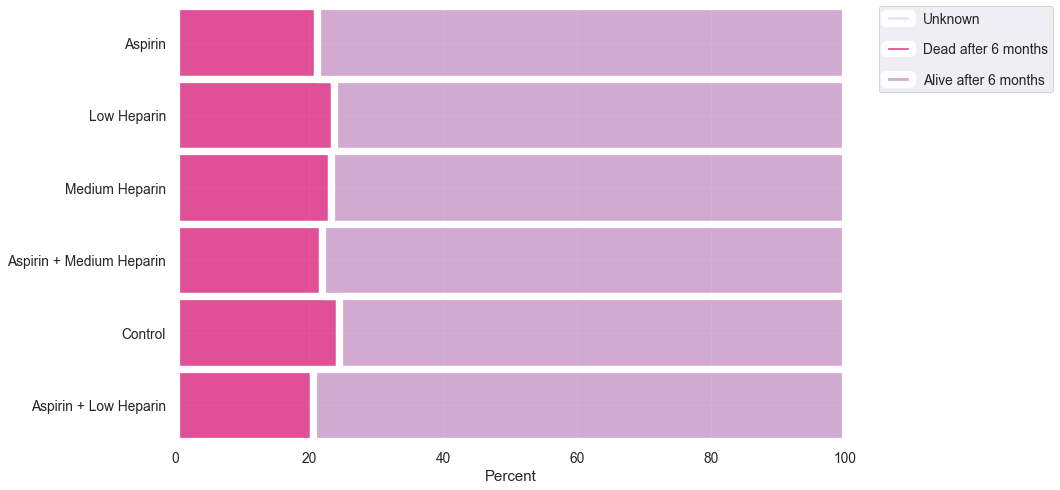

In [174]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.FDEAD,
                 stat = 'probability',
                 multiple="fill",
                 palette = ['#c994c7', '#dd1c77', '#e7e1ef', ]
                 )
ax.set(ylabel="")
ax.set(xlabel="Percent")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
        labels = ['Unknown',  'Dead after 6 months', 'Alive after 6 months'], labelspacing=1.2)

#plt.savefig("images/treat_perc_fdead.png", bbox_inches="tight")
plt.show()

<ipython-input-167-8abbddcae8cd>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


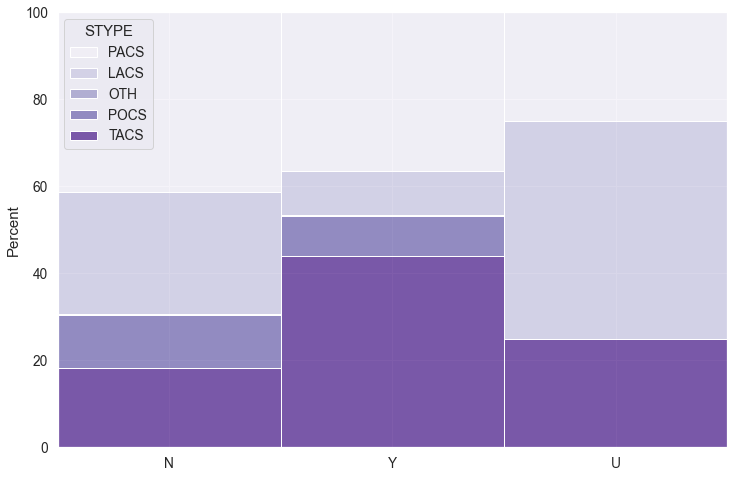

In [167]:
ax = sns.histplot(x = df.FDEAD,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [62]:
#df['FDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

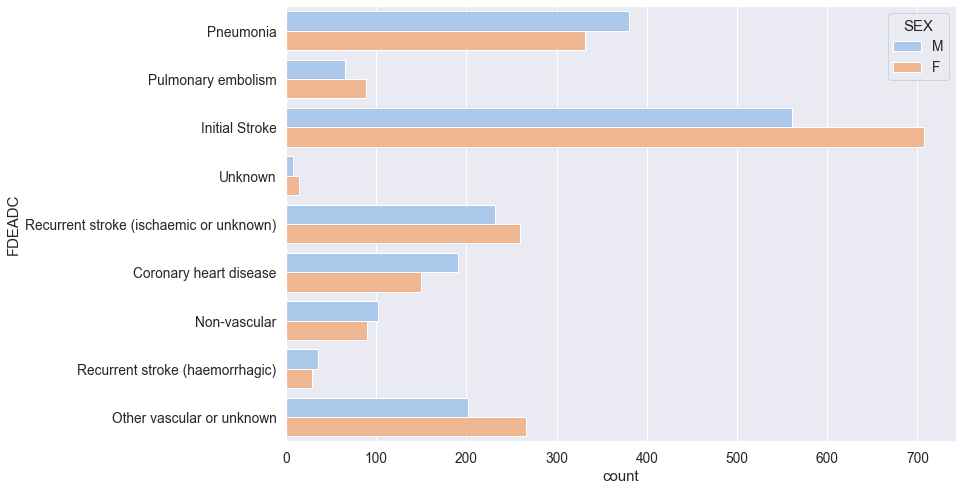

In [63]:
sns.countplot(y = df.FDEADC, hue = df.SEX)

<ipython-input-64-8dc02a88e717>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


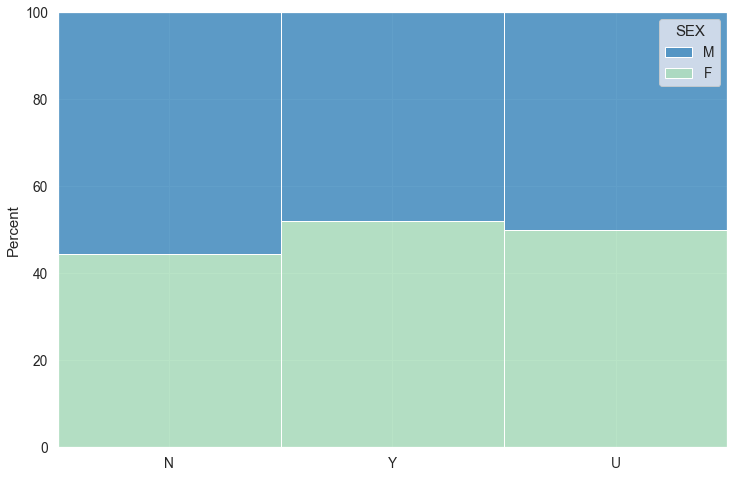

In [64]:
ax = sns.histplot(x = df.FDEAD,
                 hue= df.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

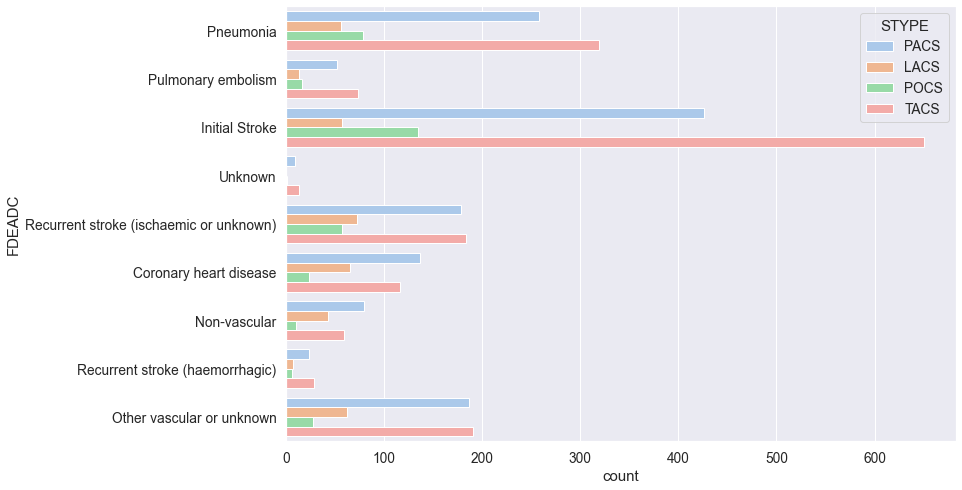

In [65]:
sns.countplot(y = df.FDEADC, hue = df.STYPE)

In [66]:
df.FDEADC.unique()

array([nan, 'Pneumonia', 'Pulmonary embolism', 'Initial Stroke',
       'Unknown', 'Recurrent stroke (ischaemic or unknown)',
       'Coronary heart disease', 'Non-vascular',
       'Recurrent stroke (haemorrhagic)', 'Other vascular or unknown'],
      dtype=object)

In [67]:
ax = sns.histplot(x = df.FDEADC,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
sns.countplot(y = df.FDEADC, hue = df.AGE_bin.sort_values())

In [ ]:
ax = sns.histplot(x = df.FDEADC,
                 hue= df.AGE_bin,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [ ]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.DDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [ ]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.FDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [72]:
ax = sns.histplot(y = df.FDEADC,
                 hue= df.TREAT14,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Cause of death (6 months)")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
sns.countplot(x = df.FRECOVER, hue = df.STYPE)

In [ ]:
ax = sns.histplot(x = df.FRECOVER,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

In [ ]:
sns.countplot(x = df.FRECOVER, hue = df.AGE_bin.sort_values())

In [76]:
#df['FPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

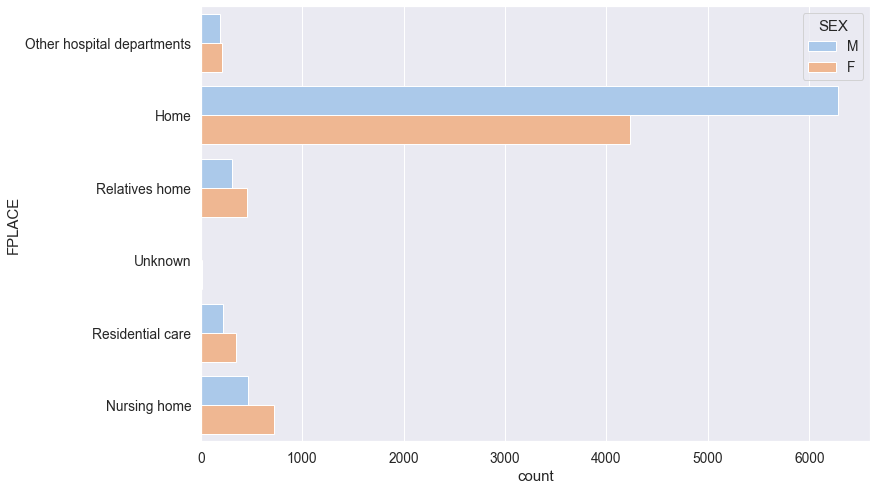

In [77]:
sns.countplot(y = df.FPLACE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

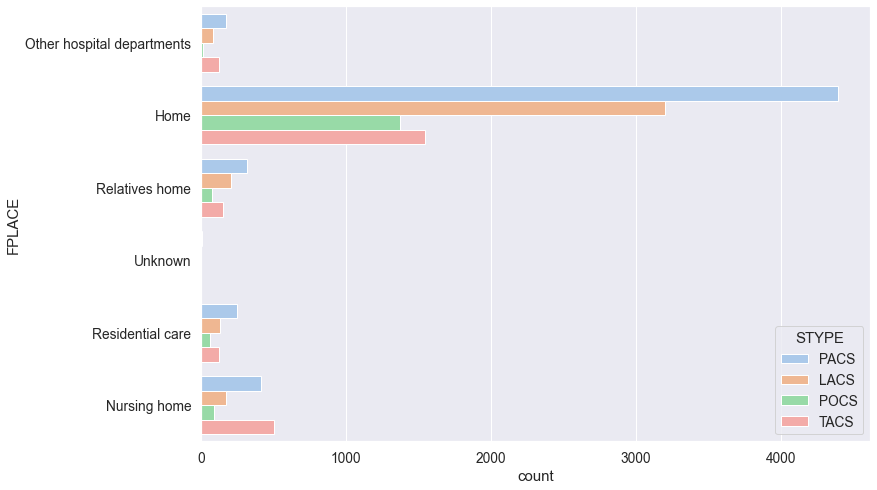

In [78]:
sns.countplot(y = df.FPLACE, hue = df.STYPE)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

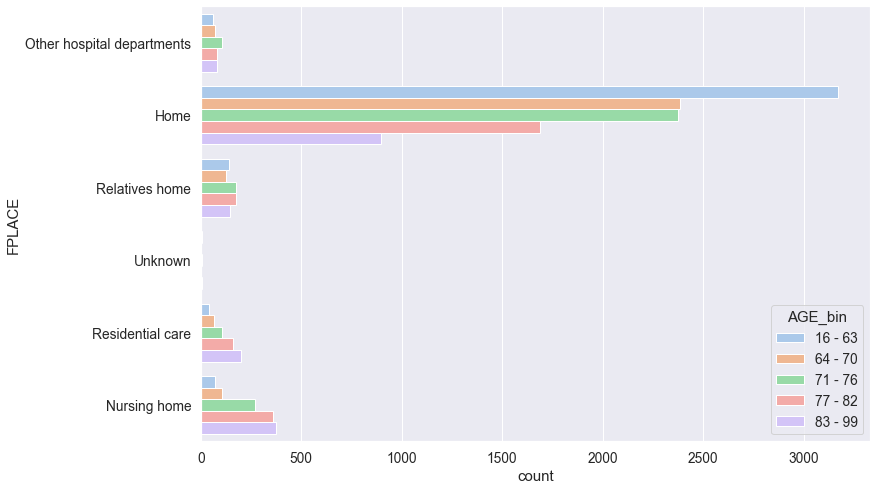

In [79]:
sns.countplot(y = df.FPLACE, hue = df.AGE_bin.sort_values())

<AxesSubplot:xlabel='FAP', ylabel='count'>

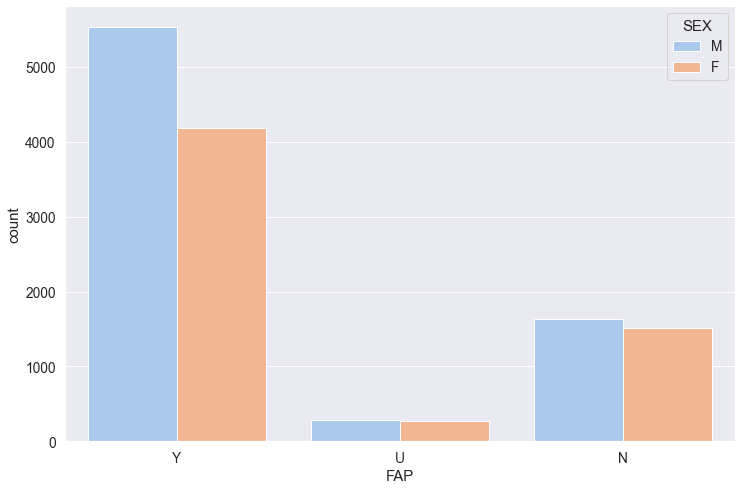

In [80]:
sns.countplot(x = df.FAP.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='FOAC', ylabel='count'>

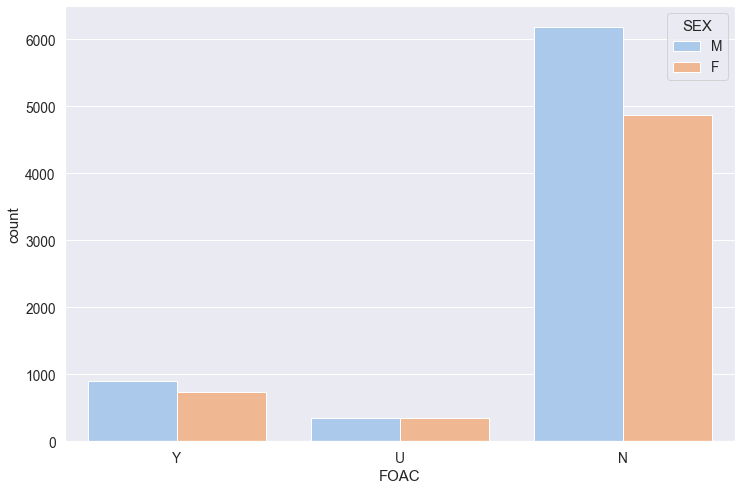

In [81]:
sns.countplot(x = df.FOAC.sort_values(ascending=False), hue = df.SEX)

In [82]:
#df['OCCODE'].replace({1: 'Dead', 2: 'Dependent', 3: 'Not recovered', 4: 'Recovered', 0: 'Unknown'}, inplace=True)

<ipython-input-183-e4cc9937ed27>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


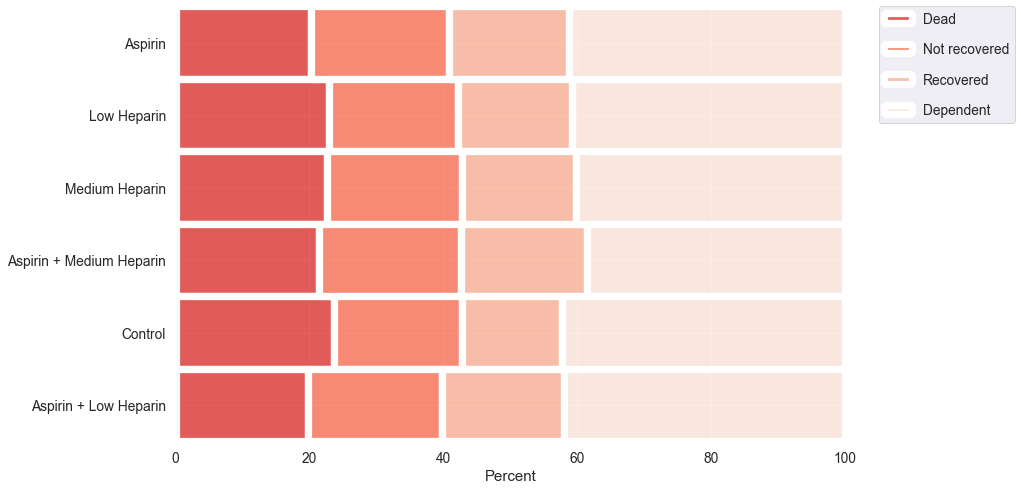

In [183]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.OCCODE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_OCCODE
                 )
ax.set(ylabel="")
ax.set(xlabel="Percent")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
        labels = ['Dead', 'Not recovered', 'Recovered', 'Dependent'], labelspacing=1.2)

#plt.savefig("images/treat_perc_occode.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

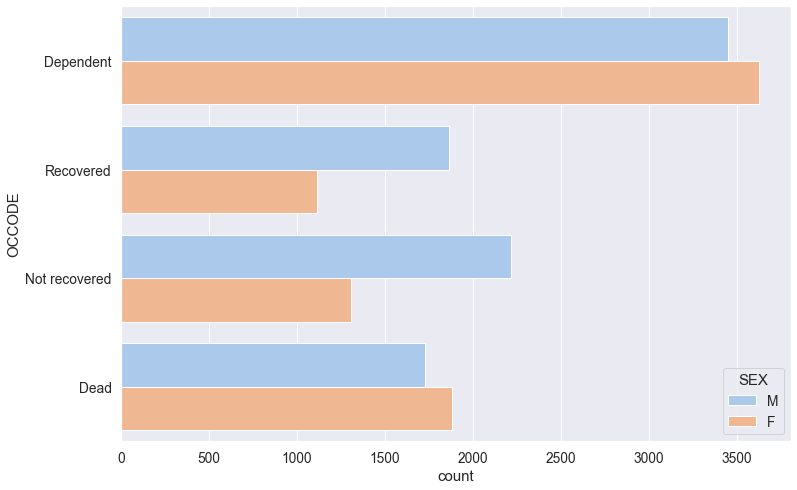

In [83]:
sns.countplot(y = df.OCCODE, hue = df.SEX)

<ipython-input-84-843e8f374aeb>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


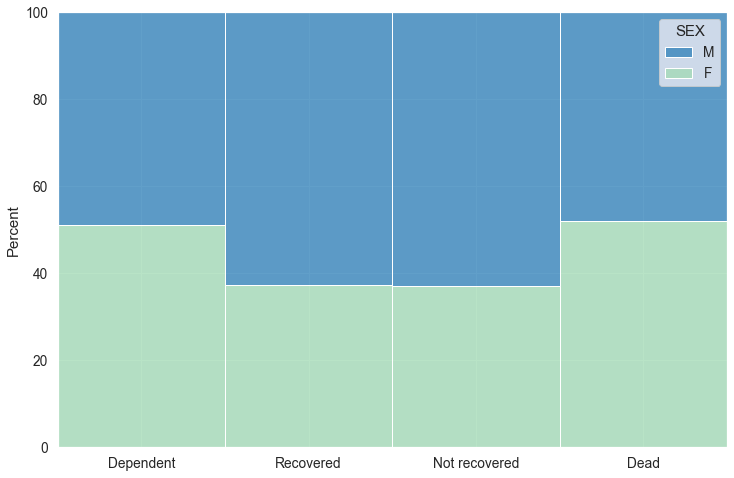

In [84]:
ax = sns.histplot(x = df.OCCODE,
                 hue= df.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<ipython-input-85-6708c0ea3a45>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


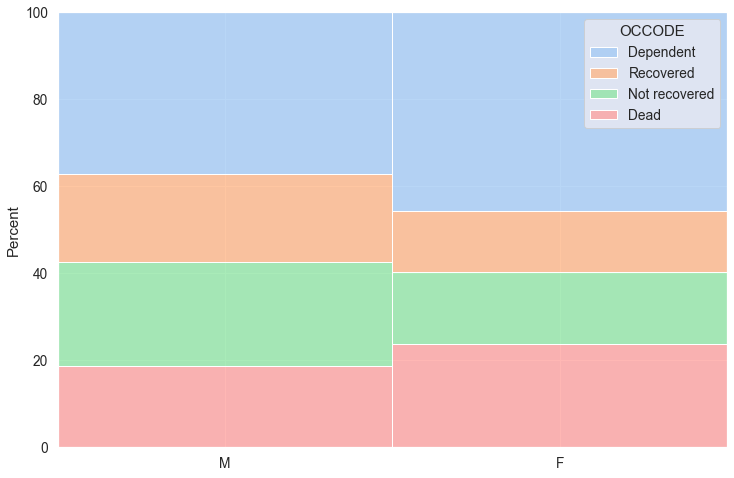

In [85]:
ax = sns.histplot(x = df.SEX,
                 hue= df.OCCODE,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_SEX
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

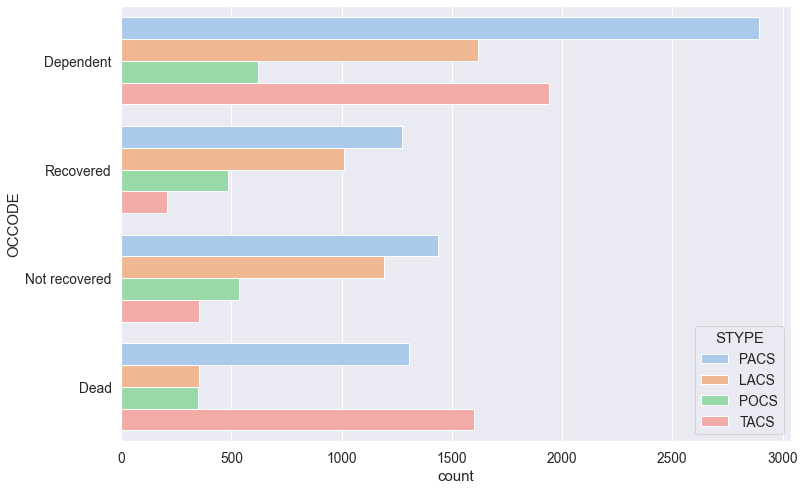

In [86]:
sns.countplot(y = df.OCCODE, hue = df.STYPE)

<ipython-input-87-b23251708c65>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


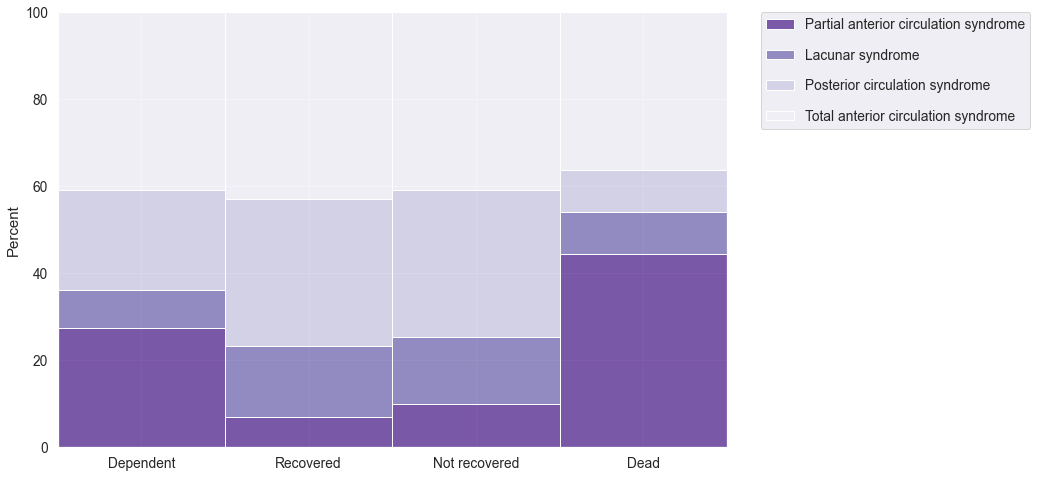

In [87]:
ax = sns.histplot(x = df.OCCODE,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

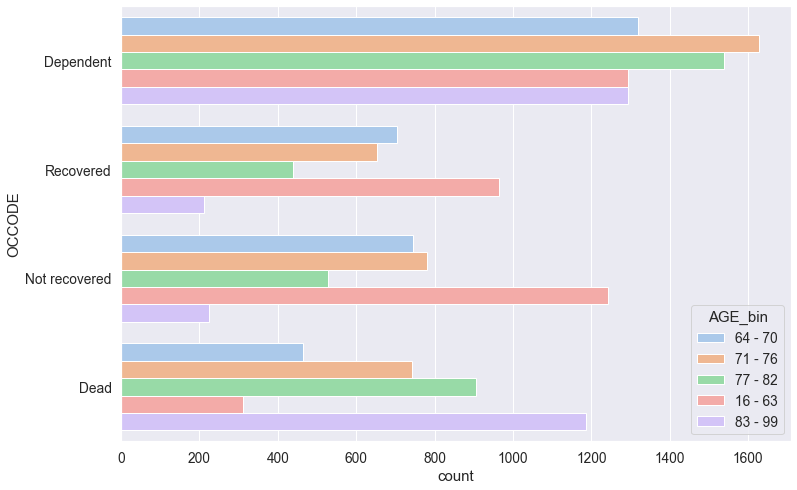

In [88]:
sns.countplot(y = df.OCCODE, hue = df.AGE_bin)

<ipython-input-89-7b63aed0734c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


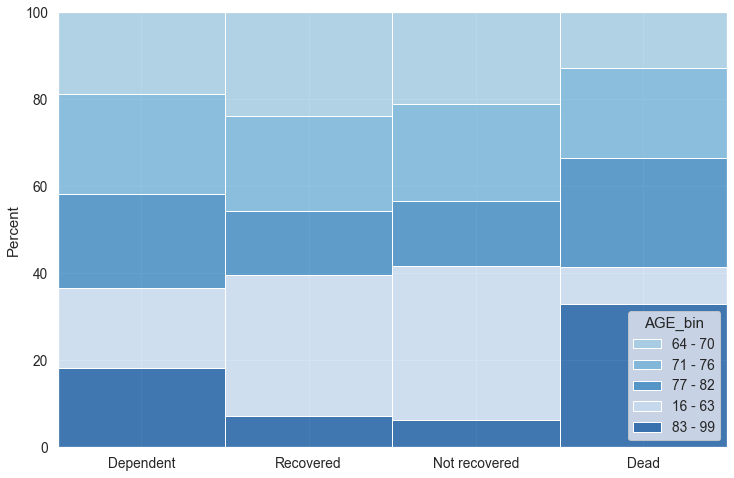

In [89]:
ax = sns.histplot(x = df.OCCODE,
                 hue= df.AGE_bin,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#         labels = ['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'], labelspacing=1.2)

#plt.savefig("images/stype_perc_sex.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='DEAD'>

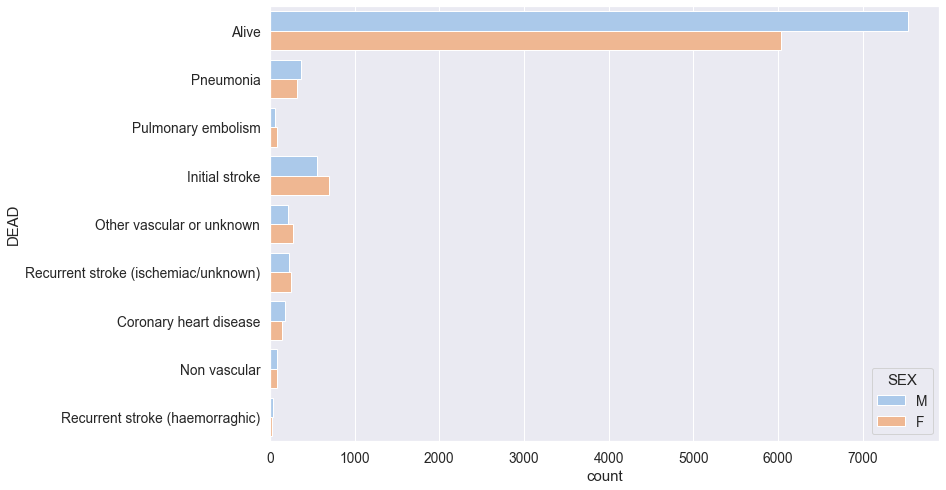

In [90]:
sns.countplot(y = df.DEAD, hue = df.SEX)

<ipython-input-91-b53a8d8b3c5e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


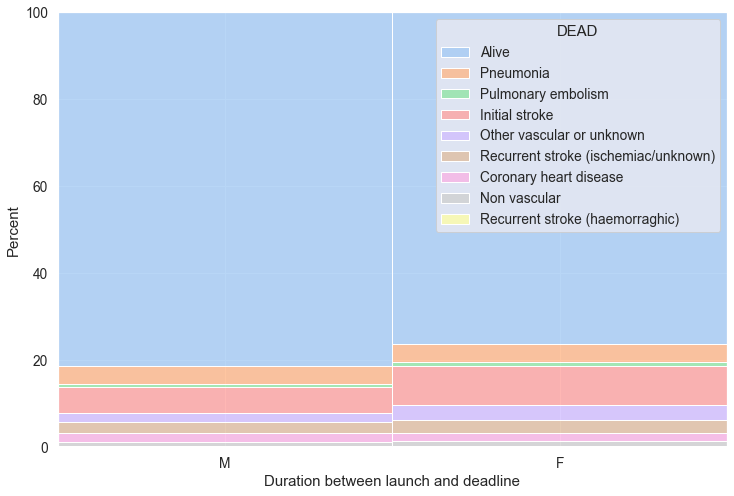

In [91]:
ax = sns.histplot(x = df.SEX,
                 hue= df.DEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [92]:
df.SEX.value_counts()
group1 = df.query('DEAD == "Alive"').groupby('DEAD')

m_count = df.SEX.value_counts()[0] # total number of male patients
f_count = df.SEX.value_counts()[1] # total number of male patients

m_alive = group1['SEX'].value_counts()[0] # number of male patients alive after 6 months
f_alive = group1['SEX'].value_counts()[1] # number of female patients alive after 6 months

print(round((m_alive / m_count * 100),2)) # percentage of male patients being alive after 6 months
print(round((f_alive / f_count * 100),2)) # percentage of male patients being alive after 6 months


81.34
76.25


In [93]:
df_dead = df.loc[df['DEAD'] != 'Alive']

<ipython-input-94-6b5ccefbde4f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


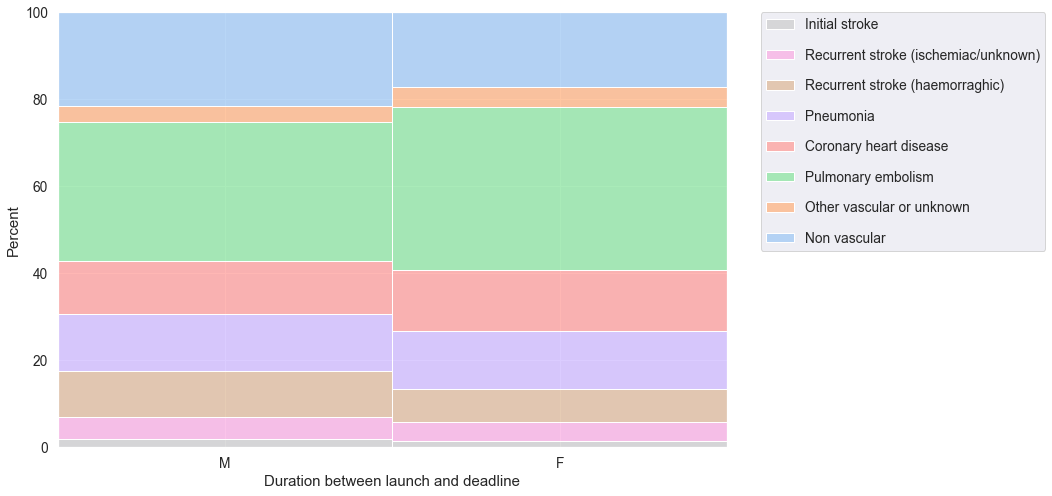

In [94]:
ax = sns.histplot(x = df_dead.SEX,
                 hue= df_dead.DEAD.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [95]:
df_alive = df.loc[df['DEAD'] == 'Alive']

In [96]:
df_alive.OCCODE.value_counts()

Dependent        7072
Not recovered    3521
Recovered        2974
Name: OCCODE, dtype: int64

In [97]:
group2 = df.query('OCCODE == "Dependent"').groupby('SEX')
print(group2['FPLACE'].value_counts())


SEX  FPLACE                    
F    Home                          2069
     Nursing home                   692
     Relatives home                 315
     Residential care               284
     Other hospital departments     197
     Unknown                         10
M    Home                          2436
     Nursing home                   452
     Relatives home                 188
     Other hospital departments     170
     Residential care               144
     Unknown                          5
Name: FPLACE, dtype: int64


In [98]:
group3 = df.query('OCCODE == "Not recovered"').groupby('SEX')
print(group3['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                          1162
     Relatives home                  80
     Residential care                33
     Nursing home                    18
     Other hospital departments      10
     Unknown                          1
M    Home                          2070
     Relatives home                  82
     Residential care                45
     Other hospital departments      11
     Nursing home                     9
Name: FPLACE, dtype: int64


In [99]:
group4 = df.query('OCCODE == "Recovered"').groupby('SEX')
print(group4['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                           999
     Relatives home                  61
     Residential care                35
     Nursing home                    10
     Other hospital departments       5
     Unknown                          1
M    Home                          1780
     Relatives home                  36
     Residential care                30
     Other hospital departments      10
     Nursing home                     5
     Unknown                          2
Name: FPLACE, dtype: int64


<ipython-input-100-68f573c18042>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


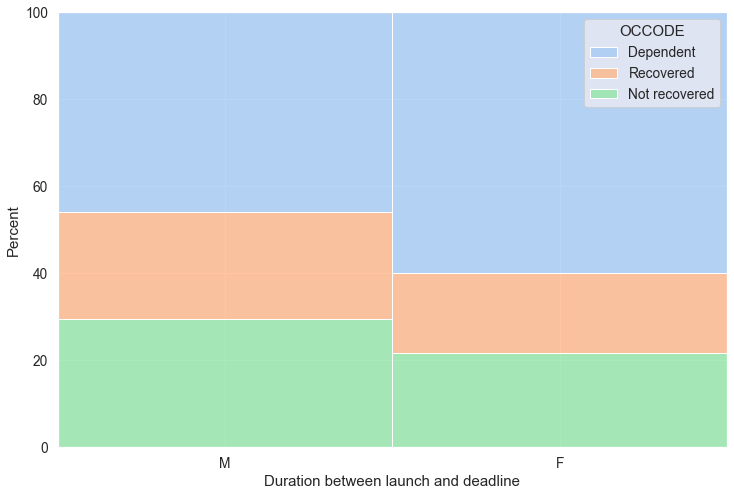

In [100]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.OCCODE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-101-6449403f472a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


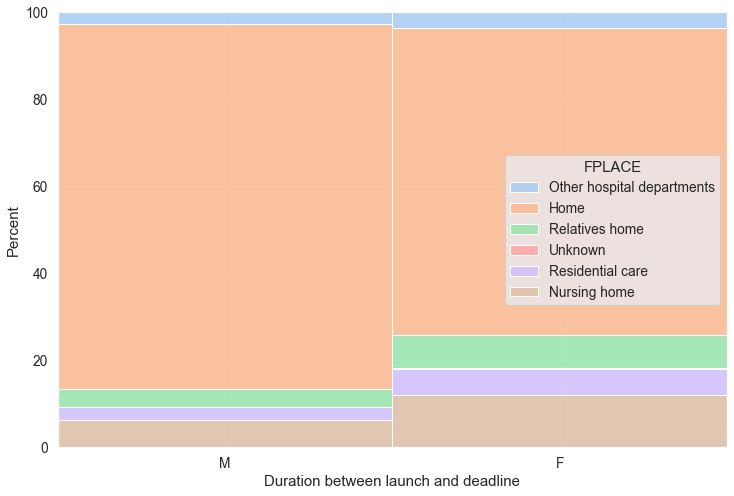

In [101]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-102-bb543009419d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


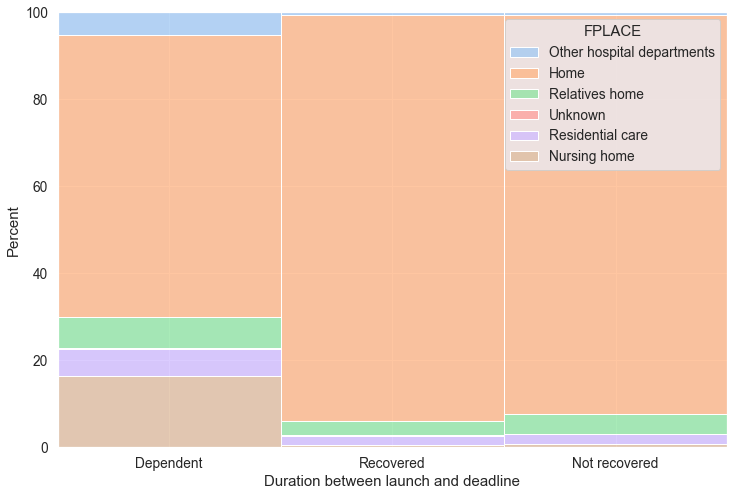

In [102]:
ax = sns.histplot(x = df_alive.OCCODE,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()